<a href="https://colab.research.google.com/github/pranay8297/deep-learning-projects/blob/master/collab_basic_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai import *
from fastai.collab import *

In [2]:
path = untar_data(URLs.ML_SAMPLE)
path.ls()

[PosixPath('/root/.fastai/data/movie_lens_sample/ratings.csv')]

In [3]:
df = pd.read_csv(path/'ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


In [4]:
from fastai.tabular import *

In [5]:
data = CollabDataBunch.from_df(df)
data.show_batch()

userId,movieId,target
105,2858,4.0
119,1,2.0
457,608,5.0
73,2959,5.0
648,780,2.0


In [6]:
data

TabularDataBunch;

Train: LabelList (4825 items)
x: CollabList
userId 73; movieId 1097; ,userId 157; movieId 260; ,userId 358; movieId 1210; ,userId 130; movieId 316; ,userId 213; movieId 1200; 
y: FloatList
4.0,3.5,5.0,2.0,3.0
Path: .;

Valid: LabelList (1206 items)
x: CollabList
userId 407; movieId 3578; ,userId 529; movieId 1221; ,userId 407; movieId 1704; ,userId 505; movieId 2762; ,userId 463; movieId 318; 
y: FloatList
3.0,2.0,5.0,3.0,5.0
Path: .;

Test: None

In [7]:
'''
collab_learner(dls, n_factors=50, use_nn=False, emb_szs=None, layers=None, config=None, y_range=None, loss_func=None, opt_func=Adam, 
lr=0.001, splitter=trainable_params, cbs=None, metrics=None, path=None, model_dir='models', wd=None, wd_bn_bias=False, train_bn=True, moms=(0.95, 0.85, 0.95))
'''
learn = collab_learner(data, n_factors = 50, y_range=[0, 5.5])
learn.lr_find()
learn.save('initial')

epoch,train_loss,valid_loss,time
0,1.876035,#na#,00:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


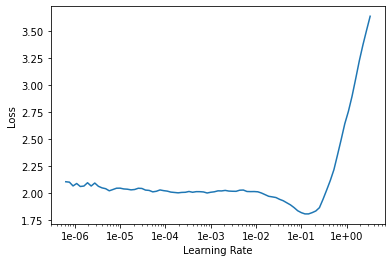

In [11]:
learn.recorder.plot()

In [12]:
learn.load('initial')
learn.fit_one_cycle(3, slice(1e-02))

epoch,train_loss,valid_loss,time
0,1.309412,0.729487,00:00
1,0.780707,0.640075,00:00
2,0.549941,0.631217,00:00


In [13]:
learn.load('initial')
learn.fit_one_cycle(3, slice(1e-01))

epoch,train_loss,valid_loss,time
0,1.822801,3.502963,00:00
1,3.402571,3.528209,00:00
2,3.350099,3.437174,00:00


In [14]:
learn.load('initial')
learn.fit_one_cycle(3, slice(2e-02))

epoch,train_loss,valid_loss,time
0,1.152386,0.781743,00:00
1,0.722661,0.672072,00:00
2,0.403181,0.657804,00:00


In [16]:
data.get_emb_szs({})

[(101, 21), (101, 21)]

In [17]:
a = nn.Embedding(10, 20)

In [23]:
a.parameters

<bound method Module.parameters of Embedding(10, 20)>

In [8]:
!pip install ipdb

  Created wheel for ipdb: filename=ipdb-0.13.3-cp36-none-any.whl size=10847 sha256=4cc5349ac60f3993330642241589a927656416346133702b82e59bfdc18d1b70
  Stored in directory: /root/.cache/pip/wheels/75/00/30/4169bcc3643f0cf946dcf37af1b71364b390c4df91da02b03c
Successfully built ipdb


In [9]:
import copy
from ipdb import set_trace as st
from torch import fmod

In [10]:
data

TabularDataBunch;

Train: LabelList (4825 items)
x: CollabList
userId 73; movieId 1097; ,userId 157; movieId 260; ,userId 358; movieId 1210; ,userId 130; movieId 316; ,userId 213; movieId 1200; 
y: FloatList
4.0,3.5,5.0,2.0,3.0
Path: .;

Valid: LabelList (1206 items)
x: CollabList
userId 407; movieId 3578; ,userId 529; movieId 1221; ,userId 407; movieId 1704; ,userId 505; movieId 2762; ,userId 463; movieId 318; 
y: FloatList
3.0,2.0,5.0,3.0,5.0
Path: .;

Test: None

In [17]:
data.train_ds.x.classes.values()

odict_values([array(['#na#', '15', '17', '19', ..., '652', '654', '664', '665'], dtype='<U21'), array(['#na#', '1', '10', '32', ..., '6539', '7153', '8961', '58559'], dtype='<U21')])

In [41]:
u, i = data.train_ds.x.classes.values()

In [42]:
#get embeddings of size data and n_factors
n_factors = 50
u_weight = embedding(len(u), n_factors)
u_bias = embedding(len(u), 1)
i_weight = embedding(len(i), n_factors)
i_bias = embedding(len(i), 1)

In [14]:
# there are 101 distinct users and 101 distinct movies in the dataset and 50 is the n_factors. 
# u_weight and i_weight contains the weights of each movie and user, and each weight is an array of length n_factors(50)
u_weight, i_weight

(Embedding(101, 50), Embedding(101, 50))

In [43]:
#looking at the data
from ipdb import set_trace as st
batch = data.one_batch()
batch

([tensor([ 76,  47,  88,  34,  65,  98,  73,  30,  28,  49,   1,   9,  17,  66,
           36,  78,  99,  73,   8,  86,  76,  84,  83,   7,  21,   4,  58,  25,
           14,   1,  62,  92,   5,  38, 100,  16,  75,  51,  80,  11,  31,  73,
           67,  81,  39,  65,  14,  63,  41,  92,  41,  96,  48,  34,  16,  33,
           22,  14,  53,  20,  69,  87,  85,  56]),
  tensor([ 92,  85,  16,  49,  74,  28,  72,  71,  72,  27,  58,  80,  95,  91,
           28,  14,  57,  40,  80,  13,  57,  34,  89,  31,  89,  98,  99,  58,
            8,   2,  42,  50,   9,  26,  39,  50,  63,  89,  91,  84,  33,  48,
           50,  75,  71,  51,  24,  79,  60,  56,  42,  32,   3,  38,  54,  89,
           81,  51,  51,  32, 100,  60,  46,  80])],
 tensor([4.0000, 3.0000, 3.5000, 5.0000, 3.0000, 4.5000, 2.0000, 4.0000, 2.5000,
         4.0000, 4.0000, 4.0000, 5.0000, 4.0000, 3.0000, 5.0000, 4.5000, 2.0000,
         4.0000, 3.0000, 3.0000, 4.0000, 3.0000, 4.0000, 3.0000, 4.5000, 3.5000,
         4.0

In [16]:
#test
a = ['x', 'y']
for i in enumerate(a):
  print(i)

(0, 'x')
(1, 'y')


In [74]:
#test
x, y = data.train_ds.x.classes.values()
get_index('12')

In [79]:
#test
'12' in u_index.keys()

df.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


In [85]:
#test
all_user_ids = df['userId'].values
type(all_user_ids)
 in all_user_ids

False

In [73]:
#not required
#test

u_index = {}
i_index = {}

for index, elem in enumerate(u):
  u_index[elem] = index

for index, elem in enumerate(i):
  i_index[elem] = index

def get_index(elem, is_item = False):

  obj = u_index
  if is_item:
    obj = i_index
  if elem in obj:
    return obj[elem]
  return None

In [44]:
x, y = data.one_batch()
u_b, i_b = x

In [17]:
#test
u_b, i_b
d = u_weight(u_b[0]) * i_weight(i_b[0])
result = d.sum() + u_bias(u_b[0]) + i_bias(i_b[0])
sigmoid_range(result, 0, 5.5), y[0]

(tensor([2.7485], grad_fn=<AddBackward0>), tensor(4.5000))

In [45]:
results = []
y_range = [0, 5.5]
for i, j in zip(u_b, i_b):
  dot = u_weight(i) * i_weight(j)
  res = dot.sum() + u_bias(i) + i_bias(j)
  results.append(sigmoid_range(res, *y_range))


In [46]:
#TEST
results

[tensor([2.7581], grad_fn=<AddBackward0>),
 tensor([2.7375], grad_fn=<AddBackward0>),
 tensor([2.7467], grad_fn=<AddBackward0>),
 tensor([2.7433], grad_fn=<AddBackward0>),
 tensor([2.7881], grad_fn=<AddBackward0>),
 tensor([2.7672], grad_fn=<AddBackward0>),
 tensor([2.7680], grad_fn=<AddBackward0>),
 tensor([2.7622], grad_fn=<AddBackward0>),
 tensor([2.7696], grad_fn=<AddBackward0>),
 tensor([2.7485], grad_fn=<AddBackward0>),
 tensor([2.7400], grad_fn=<AddBackward0>),
 tensor([2.7360], grad_fn=<AddBackward0>),
 tensor([2.7538], grad_fn=<AddBackward0>),
 tensor([2.7652], grad_fn=<AddBackward0>),
 tensor([2.7386], grad_fn=<AddBackward0>),
 tensor([2.7597], grad_fn=<AddBackward0>),
 tensor([2.7531], grad_fn=<AddBackward0>),
 tensor([2.7441], grad_fn=<AddBackward0>),
 tensor([2.7572], grad_fn=<AddBackward0>),
 tensor([2.7512], grad_fn=<AddBackward0>),
 tensor([2.7453], grad_fn=<AddBackward0>),
 tensor([2.7829], grad_fn=<AddBackward0>),
 tensor([2.7505], grad_fn=<AddBackward0>),
 tensor([2.

In [30]:
#test
# type(y), type(results)
type(tensor(results))
# loss = torch.sqrt(torch.mean((tensor(results) - y)**2))

torch.Tensor

In [47]:
#Compute RMSE Loss.
def get_loss(y_hat, y):
  if type(y_hat) != torch.Tensor:
    y_hat = tensor(y_hat)
  loss = torch.sqrt(torch.mean((tensor(y_hat) - y)**2))
  loss.requires_grad = True
  return loss
loss = get_loss(results, y)

In [48]:
#test
# loss
# print(u_weight(tensor(1)), i_weight(tensor(1)))
loss
# loss.requires_grad = True
# loss.backward()
# print('\n')
# print(u_weight(tensor(1)), i_weight(tensor(1)))

tensor(1.3756, requires_grad=True)

In [49]:
loss.requires_grad = True
loss.backward()

In [39]:
loss
lr = 1e-02

In [ ]:
#test
for i in u_weight.parameters():
  st()

In [45]:
u_weight(tensor(0))

tensor([-0.0150, -0.0028,  0.0035, -0.0127,  0.0035,  0.0021, -0.0059, -0.0191,
         0.0043,  0.0074, -0.0052,  0.0026,  0.0097,  0.0064, -0.0076,  0.0030,
         0.0010, -0.0016,  0.0088, -0.0096,  0.0086, -0.0009,  0.0038,  0.0126,
         0.0096, -0.0117,  0.0028, -0.0005, -0.0188, -0.0092, -0.0102,  0.0078,
         0.0034, -0.0033,  0.0151,  0.0032, -0.0025,  0.0005,  0.0179, -0.0050,
        -0.0033, -0.0095, -0.0035, -0.0026,  0.0131, -0.0074,  0.0074, -0.0181,
        -0.0130, -0.0094], grad_fn=<EmbeddingBackward>)